## Imports

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, spearmanr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import plotly.express as px

## Main

In [2]:
source_file_path = os.path.join(os.curdir, "Data_lake", "Gold", "marketing_campaing_gold.parquet") #ruta del fichero

In [3]:
datos_marketing_df = pd.read_parquet(source_file_path) #leemos el fichero

In [4]:
datos_marketing_df.info() #comprobamos que está bien cargado

<class 'pandas.core.frame.DataFrame'>
Index: 199984 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       199984 non-null  int64         
 1   Company           199984 non-null  object        
 2   Campaign_Type     199984 non-null  object        
 3   Target_Audience   199984 non-null  object        
 4   Duration          199984 non-null  int64         
 5   Channel_Used      199984 non-null  object        
 6   Conversion_Rate   199984 non-null  float64       
 7   Acquisition_Cost  199984 non-null  float64       
 8   ROI               199984 non-null  float64       
 9   Location          199984 non-null  object        
 10  Language          199984 non-null  object        
 11  Clicks            199984 non-null  float64       
 12  Impressions       199984 non-null  int64         
 13  Engagement_Score  199984 non-null  float64       
 14  Customer_

In [5]:
datos_marketing_df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,_BronzeTimestamp,_SilverTimestamp,_GoldTimestamp
index,,,,,,,,,,,,,,,,,,,
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506.0,1922,6.0,Health & Wellness,2021-01-01,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116.0,7523,7.0,Fashionistas,2021-01-02,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584.0,7698,1.0,Outdoor Adventurers,2021-01-03,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217.0,1820,7.0,Health & Wellness,2021-01-04,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379.0,4201,3.0,Health & Wellness,2021-01-05,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359


## Estadisticas

### Correlaciones numéricas

In [6]:
datos_marketing_df['Acquisition_Cost'].info()

<class 'pandas.core.series.Series'>
Index: 199984 entries, 0 to 199999
Series name: Acquisition_Cost
Non-Null Count   Dtype  
--------------   -----  
199984 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [7]:
#Miramos correlacion entre Acquisition_Cost y Conversion_Rate:

datos_marketing_df[["Acquisition_Cost", "Conversion_Rate"]].corr(method="kendall") 
#no hay correlacion entre Acquisition_Cost y Conversion_Rate

,Acquisition_Cost,Conversion_Rate
Acquisition_Cost,1.000000,0.000521
Conversion_Rate,0.000521,1.000000


In [8]:
#Miramos correlacion entre Clicks y Conversion_Rate:

datos_marketing_df[["Clicks", "Conversion_Rate"]].corr(method="pearson") 
#no hay correlacion entre Clicks y Conversion_Rate

,Clicks,Conversion_Rate
Clicks,1.00000,0.00033
Conversion_Rate,0.00033,1.00000


In [9]:
#Miramos correlacion entre Impressions y Conversion_Rate:

datos_marketing_df[["Impressions", "Conversion_Rate"]].corr(method="kendall") 
#no hay correlacion entre Impressions y Conversion_Rate

,Impressions,Conversion_Rate
Impressions,1.000000,-0.001951
Conversion_Rate,-0.001951,1.000000


In [10]:
#Miramos correlacion entre Engagement_Score y Conversion_Rate:

datos_marketing_df[["Engagement_Score", "Conversion_Rate"]].corr(method="pearson") 
#no hay correlacion entre Engagement_Score y Conversion_Rate

,Engagement_Score,Conversion_Rate
Engagement_Score,1.000000,-0.000683
Conversion_Rate,-0.000683,1.000000


In [11]:
#Miramos correlacion entre Duration y Conversion_Rate:

datos_marketing_df[["Duration", "Conversion_Rate"]].corr(method="pearson") 
#no hay correlacion entre Duration y Conversion_Rate

,Duration,Conversion_Rate
Duration,1.000000,-0.001063
Conversion_Rate,-0.001063,1.000000


In [12]:
#Miramos correlacion entre Acquisition_Cost y ROI:

datos_marketing_df[["Acquisition_Cost", "ROI"]].corr(method="kendall") 
#no hay correlacion entre Acquisition_Cost y ROI

,Acquisition_Cost,ROI
Acquisition_Cost,1.000000,0.003036
ROI,0.003036,1.000000


In [13]:
#Miramos correlacion entre Conversion_Rate y ROI:

datos_marketing_df[["Conversion_Rate", "ROI"]].corr(method="pearson") 
#no hay correlacion entre Conversion_Rate y ROI

,Conversion_Rate,ROI
Conversion_Rate,1.000000,-0.001148
ROI,-0.001148,1.000000


In [14]:
#Miramos correlacion entre Engagement_Score y ROI:

datos_marketing_df[["Engagement_Score", "ROI"]].corr(method="kendall") 
#no hay correlacion entre Engagement_Score y ROI

,Engagement_Score,ROI
Engagement_Score,1.000000,0.000435
ROI,0.000435,1.000000


### Correlaciones numerica/categorica

In [15]:
datos_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199984 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       199984 non-null  int64         
 1   Company           199984 non-null  object        
 2   Campaign_Type     199984 non-null  object        
 3   Target_Audience   199984 non-null  object        
 4   Duration          199984 non-null  int64         
 5   Channel_Used      199984 non-null  object        
 6   Conversion_Rate   199984 non-null  float64       
 7   Acquisition_Cost  199984 non-null  float64       
 8   ROI               199984 non-null  float64       
 9   Location          199984 non-null  object        
 10  Language          199984 non-null  object        
 11  Clicks            199984 non-null  float64       
 12  Impressions       199984 non-null  int64         
 13  Engagement_Score  199984 non-null  float64       
 14  Customer_

In [16]:
tukey = pairwise_tukeyhsd( datos_marketing_df["Conversion_Rate"], datos_marketing_df["Channel_Used"], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
     Email   Facebook  -0.0003 0.9683 -0.0012 0.0006  False
     Email Google Ads  -0.0001 0.9999  -0.001 0.0008  False
     Email  Instagram  -0.0004 0.8704 -0.0013 0.0005  False
     Email    Unknown  -0.0553 0.4632 -0.1399 0.0294  False
     Email    Website  -0.0001 0.9999  -0.001 0.0008  False
     Email    YouTube  -0.0004   0.87 -0.0013 0.0005  False
  Facebook Google Ads   0.0002 0.9965 -0.0007 0.0011  False
  Facebook  Instagram  -0.0001 0.9999  -0.001 0.0008  False
  Facebook    Unknown   -0.055   0.47 -0.1396 0.0297  False
  Facebook    Website   0.0002 0.9964 -0.0007 0.0011  False
  Facebook    YouTube  -0.0001 0.9999  -0.001 0.0008  False
Google Ads  Instagram  -0.0003 0.9657 -0.0012 0.0006  False
Google Ads    Unknown  -0.0552 0.4655 -0.1398 0.0295  False
Google Ads    Website      0.0    1.0 -0

In [17]:
tukey = pairwise_tukeyhsd( datos_marketing_df["Conversion_Rate"], datos_marketing_df["Language"], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 English   French   0.0001 0.9998 -0.0007 0.0009  False
 English   German  -0.0002 0.9839  -0.001 0.0006  False
 English Mandarin  -0.0001 0.9974 -0.0009 0.0007  False
 English  Spanish  -0.0002 0.9554 -0.0011 0.0006  False
 English  Unknown   0.0198 0.9966 -0.0959 0.1355  False
  French   German  -0.0003 0.9292 -0.0011 0.0005  False
  French Mandarin  -0.0002 0.9767  -0.001 0.0006  False
  French  Spanish  -0.0003 0.8632 -0.0011 0.0005  False
  French  Unknown   0.0198 0.9967  -0.096 0.1355  False
  German Mandarin   0.0001 0.9999 -0.0008 0.0009  False
  German  Spanish  -0.0001    1.0 -0.0009 0.0008  False
  German  Unknown     0.02 0.9964 -0.0957 0.1357  False
Mandarin  Spanish  -0.0001 0.9986 -0.0009 0.0007  False
Mandarin  Unknown     0.02 0.9965 -0.0957 0.1357  False
 Spanish  Unknown   0.0201 0.9964 -0.0956 0.1358

In [18]:
#No obtenemos ninguna correlación ni entre variales numericas, ni entre tipo numericas y categóricas

## Visuales

In [19]:
#visualizamos la tabla
datos_marketing_df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,_BronzeTimestamp,_SilverTimestamp,_GoldTimestamp
index,,,,,,,,,,,,,,,,,,,
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506.0,1922,6.0,Health & Wellness,2021-01-01,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116.0,7523,7.0,Fashionistas,2021-01-02,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584.0,7698,1.0,Outdoor Adventurers,2021-01-03,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217.0,1820,7.0,Health & Wellness,2021-01-04,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379.0,4201,3.0,Health & Wellness,2021-01-05,2025-11-10 18:42:48.016782,2025-11-10 19:08:12.886604,2025-11-10 19:08:18.213359


In [20]:
#Función para mostrar las compañías que se encuentran en el df
nombres_unicos = datos_marketing_df['Company'].unique()
print(nombres_unicos)
#hacemos esto para posteriormente hacer filtro en función de las compañias

['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp' 'Unknown']


In [21]:
#Hacemos filtro en función de las compañias
next_gen_data_df = datos_marketing_df[datos_marketing_df["Company"] == "NexGen Systems"]
innovate_industries_gen_data_df = datos_marketing_df[datos_marketing_df["Company"] == "Innovate Industries"]
alpha_innovations_gen_data_df = datos_marketing_df[datos_marketing_df["Company"] == "Alpha Innovations"]
datatech_solutions_gen_data_df = datos_marketing_df[datos_marketing_df["Company"] == "DataTech Solutions"]
TechCorp_gen_data_df = datos_marketing_df[datos_marketing_df["Company"] == "TechCorp"]
Unknown_data_df = datos_marketing_df[datos_marketing_df["Company"] == "Unknown"]


C:\Users\noagg\AppData\Local\Temp\ipykernel_37380\695970837.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(next_gen_data_df, x='Date', y='ROI', ax=axes[0, 0], color='red', linewidth=1, ci=None)
C:\Users\noagg\AppData\Local\Temp\ipykernel_37380\695970837.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(innovate_industries_gen_data_df, x='Date', y='ROI', ax=axes[0, 1], color='green', linewidth=1, ci=None)
C:\Users\noagg\AppData\Local\Temp\ipykernel_37380\695970837.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(alpha_innovations_gen_data_df, x='Date', y='ROI', ax=axes[0, 2], color='orange', linewidth=1, ci=None)
C:\Users\noagg\AppData\Local\Temp\ipykernel_37380\695970837.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(datatec

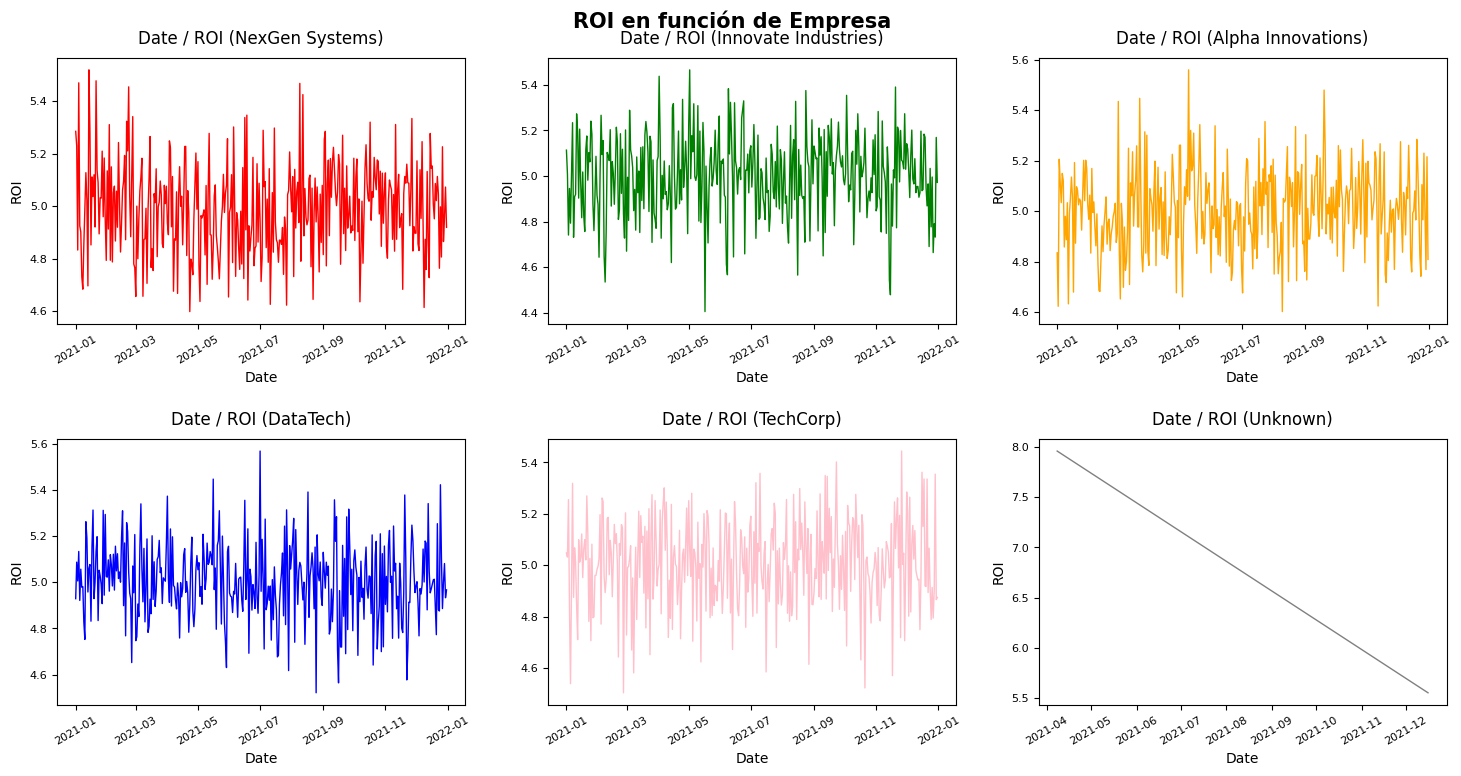

In [22]:
#Generamos graficas independientes con los filtros creados anteriormente

# Crear figura 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# --- Gráfico 1 ---
sns.lineplot(next_gen_data_df, x='Date', y='ROI', ax=axes[0, 0], color='red', linewidth=1, ci=None)
axes[0, 0].set_title('Date / ROI (NexGen Systems)', fontsize=12, pad=10)
axes[0, 0].set_xlabel('Date', fontsize=10)
axes[0, 0].set_ylabel('ROI', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=30, labelsize=8)
axes[0, 0].tick_params(axis='y', labelsize=8)

# --- Gráfico 2 ---
sns.lineplot(innovate_industries_gen_data_df, x='Date', y='ROI', ax=axes[0, 1], color='green', linewidth=1, ci=None)
axes[0, 1].set_title('Date / ROI (Innovate Industries)', fontsize=12, pad=10)
axes[0, 1].set_xlabel('Date', fontsize=10)
axes[0, 1].set_ylabel('ROI', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=30, labelsize=8)
axes[0, 1].tick_params(axis='y', labelsize=8)

# --- Gráfico 3 ---
sns.lineplot(alpha_innovations_gen_data_df, x='Date', y='ROI', ax=axes[0, 2], color='orange', linewidth=1, ci=None)
axes[0, 2].set_title('Date / ROI (Alpha Innovations)', fontsize=12, pad=10)
axes[0, 2].set_xlabel('Date', fontsize=10)
axes[0, 2].set_ylabel('ROI', fontsize=10)
axes[0, 2].tick_params(axis='x', rotation=30, labelsize=8)
axes[0, 2].tick_params(axis='y', labelsize=8)

# --- Gráfico 4 ---
sns.lineplot(datatech_solutions_gen_data_df, x='Date', y='ROI', ax=axes[1, 0], color='blue', linewidth=1, ci=None)
axes[1, 0].set_title('Date / ROI (DataTech)', fontsize=12, pad=10)
axes[1, 0].set_xlabel('Date', fontsize=10)
axes[1, 0].set_ylabel('ROI', fontsize=10)
axes[1, 0].tick_params(axis='x', rotation=30, labelsize=8)
axes[1, 0].tick_params(axis='y', labelsize=8)

# --- Gráfico 5 ---
sns.lineplot(TechCorp_gen_data_df, x='Date', y='ROI', ax=axes[1, 1], color='pink', linewidth=1, ci=None)
axes[1, 1].set_title('Date / ROI (TechCorp)', fontsize=12, pad=10)
axes[1, 1].set_xlabel('Date', fontsize=10)
axes[1, 1].set_ylabel('ROI', fontsize=10)
axes[1, 1].tick_params(axis='x', rotation=30, labelsize=8)
axes[1, 1].tick_params(axis='y', labelsize=8)

# --- Gráfico 6 ---
sns.lineplot(Unknown_data_df, x='Date', y='ROI', ax=axes[1, 2], color='grey', linewidth=1, ci=None)
axes[1, 2].set_title('Date / ROI (Unknown)', fontsize=12, pad=10)
axes[1, 2].set_xlabel('Date', fontsize=10)
axes[1, 2].set_ylabel('ROI', fontsize=10)
axes[1, 2].tick_params(axis='x', rotation=30, labelsize=8)
axes[1, 2].tick_params(axis='y', labelsize=8)

# --- Ajustes globales ---
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.92)
fig.suptitle("ROI en función de Empresa", fontsize=15, fontweight='bold')

plt.show()


In [23]:
#Hacemos filtro por fecha tomando el último mes
last_month_df = datos_marketing_df[datos_marketing_df['Date'] >= "2021-12-01"]

In [24]:
#Como el volumen de datos es muy grande se analizarán los datos del último mes para que sea más manejable

C:\Users\noagg\AppData\Local\Temp\ipykernel_37380\861351318.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(last_month_df, x='Date', y='ROI', hue='Company', ax=ax, linewidth=1, ci=None)


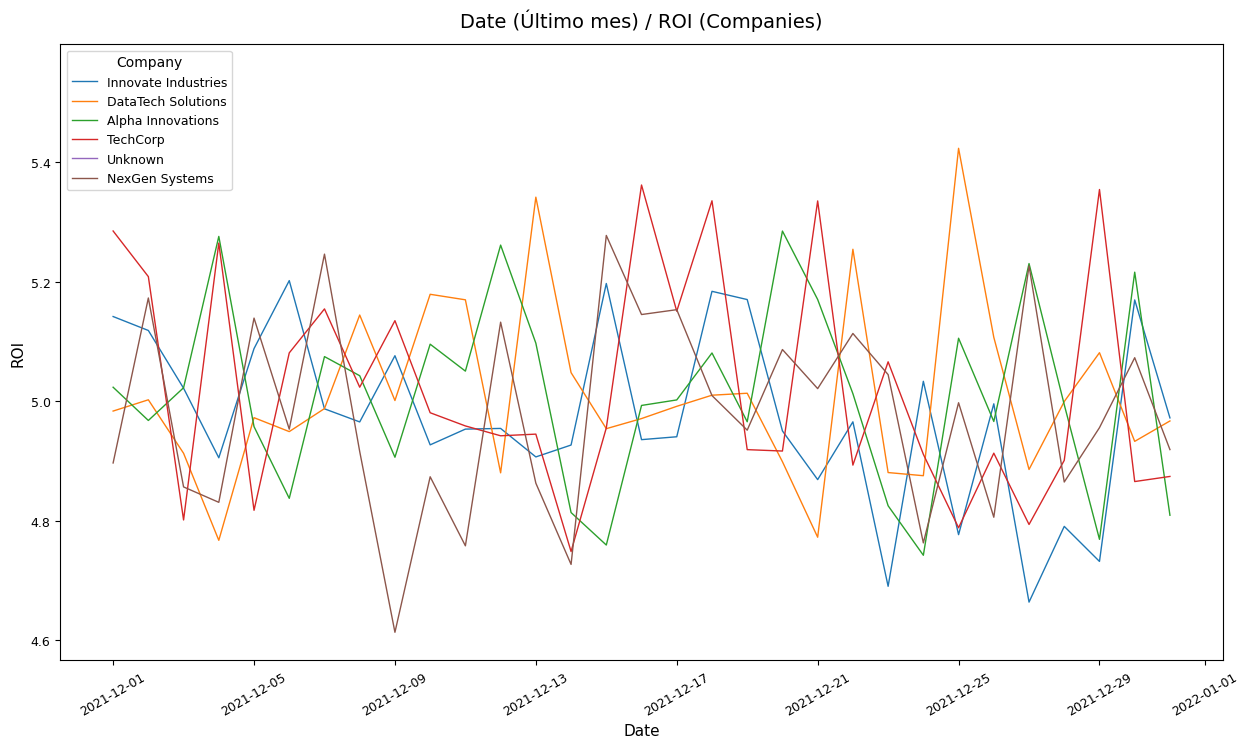

In [25]:
#Creamos un grafico de la evolución del ultimos mes del ROI en cada compañia: Muestra cómo evoluciona el rendimiento de inversión de cada empresa con el tiempo 

fig, ax = plt.subplots(figsize=(15, 8))

# Gráfico principal
sns.lineplot(last_month_df, x='Date', y='ROI', hue='Company', ax=ax, linewidth=1, ci=None)

# Personalización
ax.set_title('Date (Último mes) / ROI (Companies)', fontsize=14, pad=12)
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('ROI', fontsize=11)
ax.tick_params(axis='x', rotation=30, labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.legend(title='Company', fontsize=9, title_fontsize=10)

plt.show()

#NexGen Systems fuerte pico el dia 9

C:\Users\noagg\AppData\Local\Temp\ipykernel_37380\2630350630.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(last_month_df, x='Date', y='Conversion_Rate', hue='Company', ci=None)


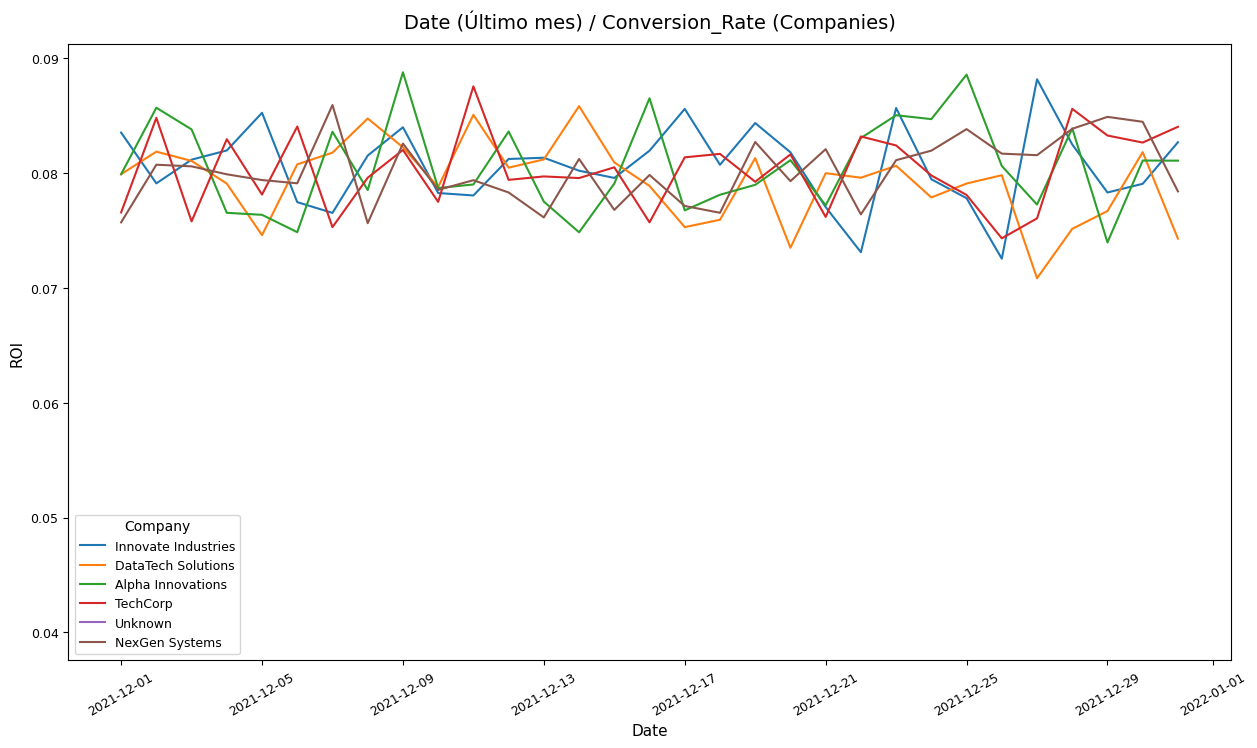

In [26]:
#Tasa de Conversión frente tiempo (último mes) por compañía

fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(last_month_df, x='Date', y='Conversion_Rate', hue='Company', ci=None)

# Personalización
ax.set_title('Date (Último mes) / Conversion_Rate (Companies)', fontsize=14, pad=12)
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('ROI', fontsize=11)
ax.tick_params(axis='x', rotation=30, labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.legend(title='Company', fontsize=9, title_fontsize=10)

plt.show()

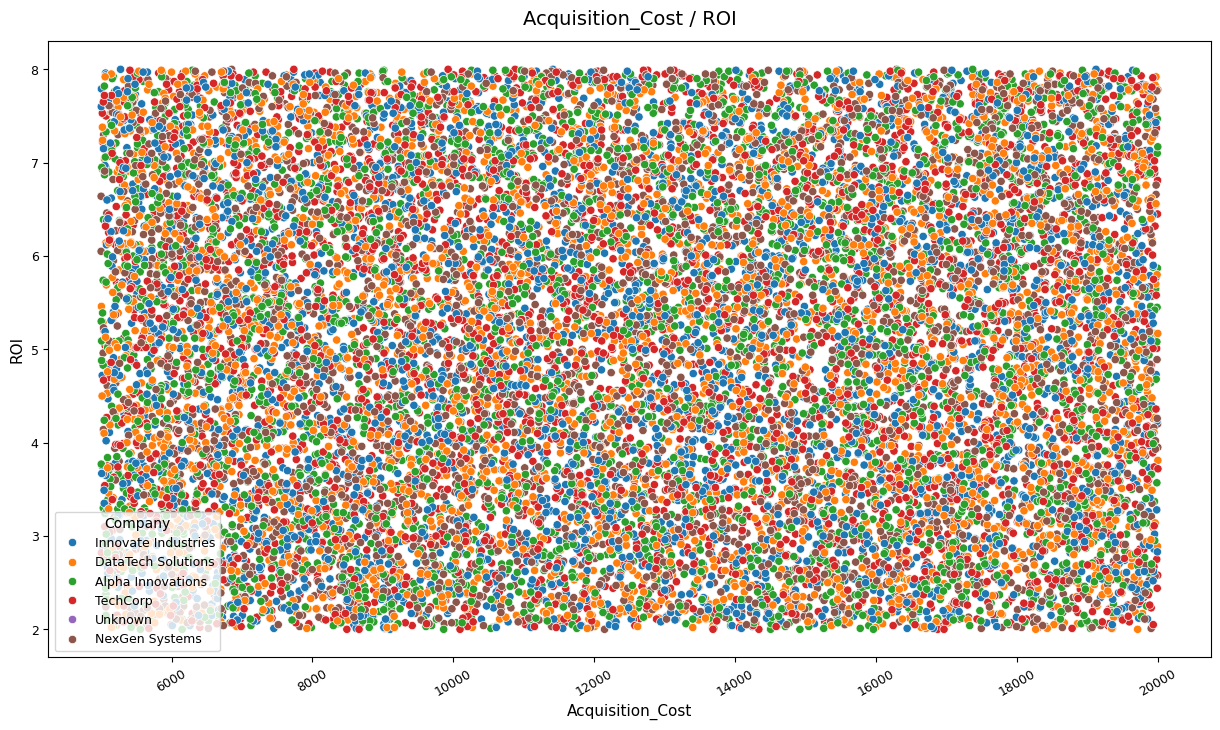

In [27]:
#Permite comprobar las inversiones que dan mejor retorno.

fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(last_month_df, x='Acquisition_Cost', y='ROI', hue='Company')

# Personalización
ax.set_title('Acquisition_Cost / ROI', fontsize=14, pad=12)
ax.set_xlabel('Acquisition_Cost', fontsize=11)
ax.set_ylabel('ROI', fontsize=11)
ax.tick_params(axis='x', rotation=30, labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.legend(title='Company', fontsize=9, title_fontsize=10)

plt.show()

#observamos que no hay una relación clara entre Acquisition_Cost y ROI


C:\Users\noagg\AppData\Local\Temp\ipykernel_37380\1970950849.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(last_month_df, x='Campaign_Type', y='ROI', ax=axes[0], color='red', linewidth=1, ci=None)
C:\Users\noagg\AppData\Local\Temp\ipykernel_37380\1970950849.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(last_month_df, x='Target_Audience', y='ROI', ax=axes[1], color='blue', linewidth=1, ci=None)


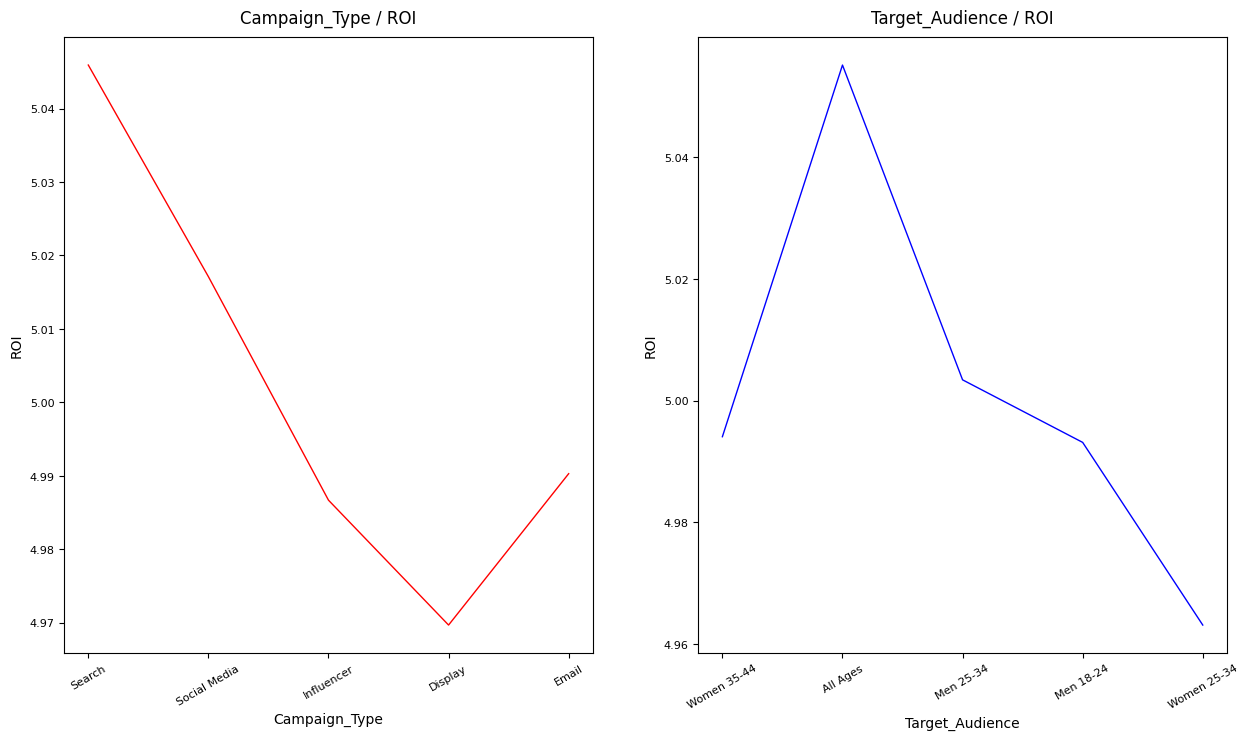

In [28]:
#ROI por Target_Audience o Customer_Segment

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

#Promedio de ROI por tipo de campaña
sns.lineplot(last_month_df, x='Campaign_Type', y='ROI', ax=axes[0], color='red', linewidth=1, ci=None)
axes[0].set_title('Campaign_Type / ROI', fontsize=12, pad=10)
axes[0].set_xlabel('Campaign_Type', fontsize=10)
axes[0].set_ylabel('ROI', fontsize=10)
axes[0].tick_params(axis='x', rotation=30, labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

#Promedio de ROI por tipo de audiencia
sns.lineplot(last_month_df, x='Target_Audience', y='ROI', ax=axes[1], color='blue', linewidth=1, ci=None)
axes[1].set_title('Target_Audience / ROI', fontsize=12, pad=10)
axes[1].set_xlabel('Target_Audience', fontsize=10)
axes[1].set_ylabel('ROI', fontsize=10)
axes[1].tick_params(axis='x', rotation=30, labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)


plt.show()

#mejor ROI por campaign type: search
#peor ROI por campaign type: display

#mejor ROI por target audience: all ages
#peor ROI por target audience: women 25-34

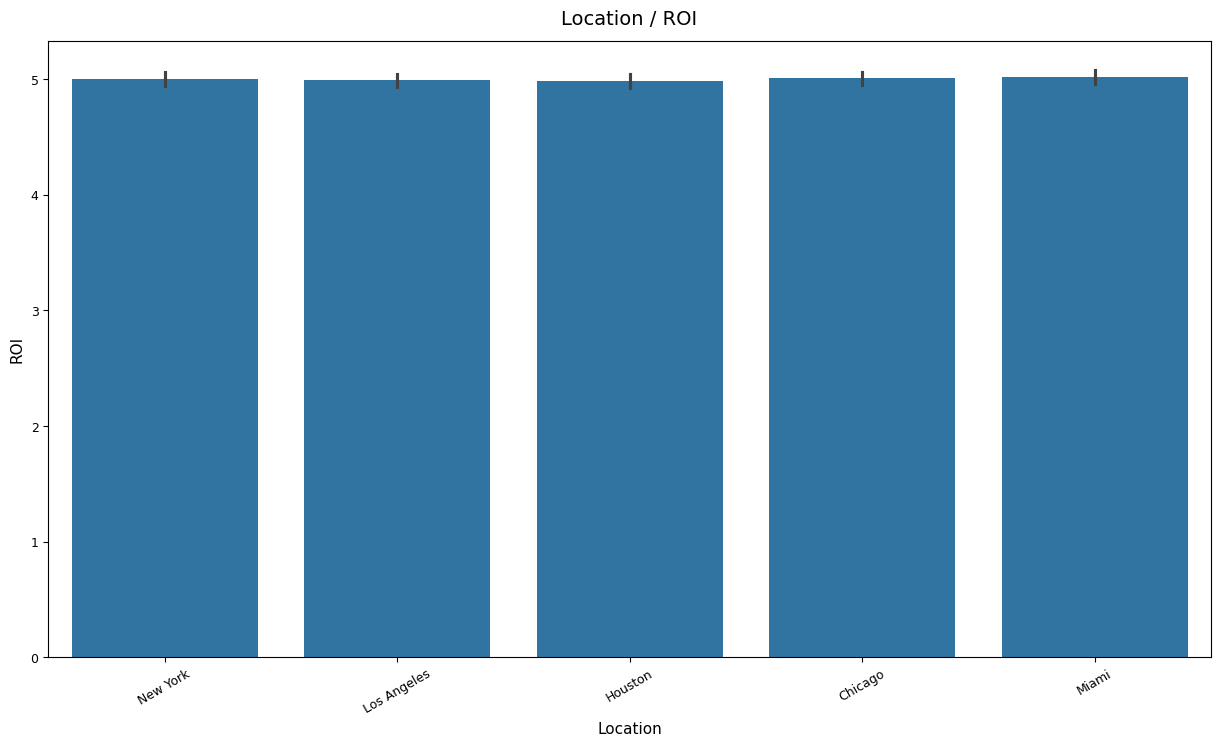

In [29]:
#Muestra que Localizaciones tienen los mejores resultados

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(last_month_df, x='Location', y='ROI')

# Personalización
ax.set_title('Location / ROI', fontsize=14, pad=12)
ax.set_xlabel('Location', fontsize=11)
ax.set_ylabel('ROI', fontsize=11)
ax.tick_params(axis='x', rotation=30, labelsize=9)
ax.tick_params(axis='y', labelsize=9)

plt.show()

#no hay relacion clara entre mejor ROI en función de location

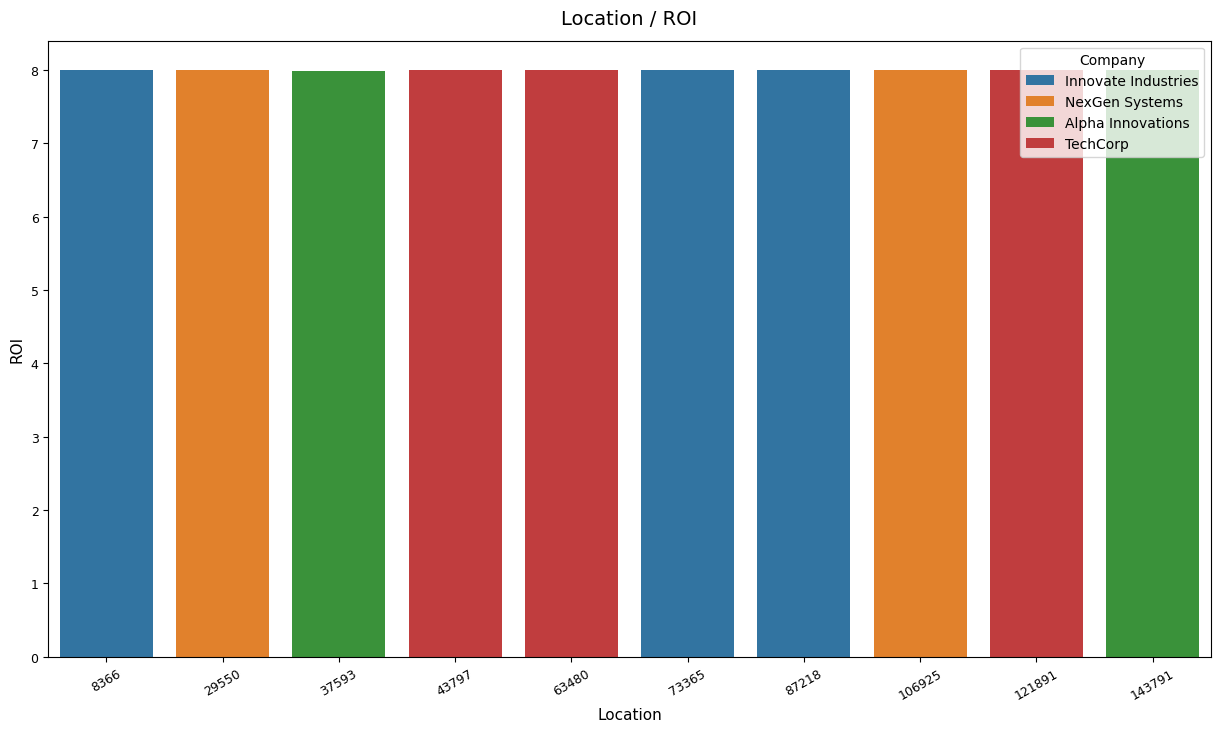

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
top10 = last_month_df.nlargest(10, 'ROI')
sns.barplot(data=top10, x='Campaign_ID', y='ROI', hue='Company')

# Personalización
ax.set_title('Campaign_ID / ROI', fontsize=14, pad=12)
ax.set_xlabel('Campaign_ID', fontsize=11)
ax.set_ylabel('ROI', fontsize=11)
ax.tick_params(axis='x', rotation=30, labelsize=9)
ax.tick_params(axis='y', labelsize=9)

plt.show()


In [ ]:
#Relación entre rentabilidad, coste y tasa de conversión
datos_3d={
    "ROI": last_month_df["ROI"],
    "Acquisition_Cost": last_month_df["Acquisition_Cost"],
    "Conversion_Rate": last_month_df["Conversion_Rate"],
    "Company": last_month_df["Company"]
}

df_3d = pd.DataFrame(datos_3d)

fig = px.scatter_3d(df_3d,
                   x='Acquisition_Cost',
                   y='Conversion_Rate',
                   z='ROI',
                   color='Company',
                   title='Análisis 3D: ROI vs Acquisition Cost vs Conversion Rate',
                   opacity=0.7)

fig.update_layout(
    scene=dict(
        xaxis_title='Acquisition Cost',
        yaxis_title='Conversion Rate',
        zaxis_title='ROI'
    ),
    legend_title='Company'
)

fig.show()